In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

In [20]:
from __future__ import print_function
from keras.models import Model
from keras.layers import Dense, Input
from keras.datasets import mnist
from keras.regularizers import l1
from keras.optimizers import Adam
import keras
from keras import layers

In [ ]:
(x_train, _), (x_test, _) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [ ]:
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


In [ ]:
encoding_dim = 32  
input_img = keras.Input(shape=(784,))
encoded = layers.Dense(encoding_dim, activation='relu')(input_img)
decoded = layers.Dense(784, activation='sigmoid')(encoded)
autoencoder = keras.Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [ ]:
encoder = keras.Model(input_img, encoded)
encoded_input = keras.Input(shape=(encoding_dim,))
decoder_layer = autoencoder.layers[-1]
decoder = keras.Model(encoded_input, decoder_layer(encoded_input))

In [ ]:
autoencoder.fit(x_train, x_train,epochs=50,batch_size=256,shuffle=True,validation_data=(x_test, x_test))

Epoch 1/50
235/235 [==============================] - 3s 12ms/step - loss: 0.4994 - val_loss: 0.3460
Epoch 2/50
235/235 [==============================] - 3s 11ms/step - loss: 0.3358 - val_loss: 0.3203
Epoch 3/50
235/235 [==============================] - 3s 11ms/step - loss: 0.3143 - val_loss: 0.3069
Epoch 4/50
235/235 [==============================] - 2s 11ms/step - loss: 0.3021 - val_loss: 0.2996
Epoch 5/50
235/235 [==============================] - 3s 12ms/step - loss: 0.2958 - val_loss: 0.2949
Epoch 6/50
235/235 [==============================] - 3s 12ms/step - loss: 0.2923 - val_loss: 0.2920
Epoch 7/50
235/235 [==============================] - 3s 12ms/step - loss: 0.2896 - val_loss: 0.2901
Epoch 8/50
235/235 [==============================] - 3s 12ms/step - loss: 0.2874 - val_loss: 0.2888
Epoch 9/50
235/235 [==============================] - 3s 11ms/step - loss: 0.2855 - val_loss: 0.2879
Epoch 10/50
235/235 [==============================] - 3s 12ms/step - loss: 0.2858 - val_lo

In [ ]:
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

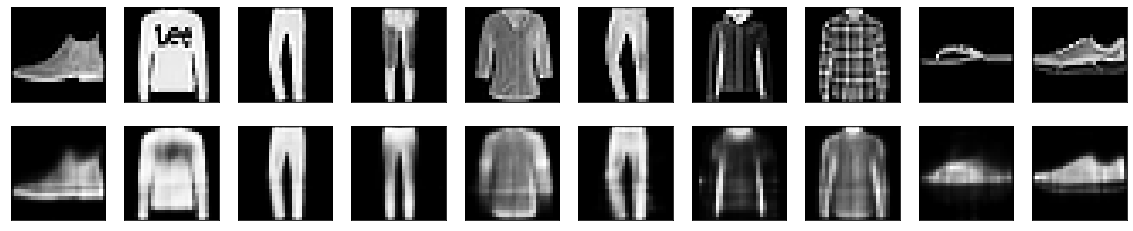

In [ ]:
import matplotlib.pyplot as plt

n = 10  # How many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)


    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [ ]:
### SPARSE AUTOENCODER ##############

In [ ]:
from keras import regularizers

encoding_dim = 32

input_img = keras.Input(shape=(784,))
encoded = layers.Dense(encoding_dim, activation='relu',activity_regularizer=regularizers.l2(10e-005))(input_img)
decoded = layers.Dense(784, activation='sigmoid')(encoded)
autoencoder = keras.Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [ ]:
encoder = keras.Model(input_img, encoded)
encoded_input = keras.Input(shape=(encoding_dim,))
decoder_layer = autoencoder.layers[-1]
decoder = keras.Model(encoded_input, decoder_layer(encoded_input))

In [ ]:
autoencoder.fit(x_train, x_train,epochs=50,batch_size=256,shuffle=True,validation_data=(x_test, x_test))

Epoch 1/50
235/235 [==============================] - 3s 12ms/step - loss: 0.5182 - val_loss: 0.3645
Epoch 2/50
235/235 [==============================] - 3s 11ms/step - loss: 0.3528 - val_loss: 0.3344
Epoch 3/50
235/235 [==============================] - 3s 12ms/step - loss: 0.3281 - val_loss: 0.3205
Epoch 4/50
235/235 [==============================] - 3s 12ms/step - loss: 0.3154 - val_loss: 0.3119
Epoch 5/50
235/235 [==============================] - 3s 12ms/step - loss: 0.3087 - val_loss: 0.3063
Epoch 6/50
235/235 [==============================] - 3s 11ms/step - loss: 0.3035 - val_loss: 0.3029
Epoch 7/50
235/235 [==============================] - 3s 12ms/step - loss: 0.3006 - val_loss: 0.3009
Epoch 8/50
235/235 [==============================] - 3s 12ms/step - loss: 0.2978 - val_loss: 0.2990
Epoch 9/50
235/235 [==============================] - 3s 12ms/step - loss: 0.2964 - val_loss: 0.2978
Epoch 10/50
235/235 [==============================] - 3s 12ms/step - loss: 0.2955 - val_lo

In [ ]:
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

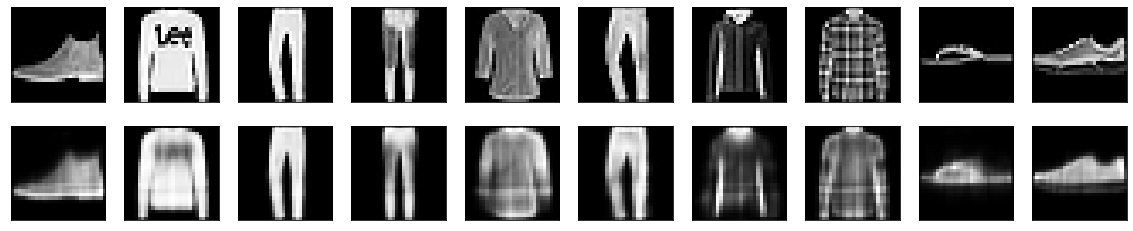

In [ ]:
import matplotlib.pyplot as plt

n = 10  # How many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)


    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

# ##### Deep autoencoder ############***

In [ ]:
(x_train, _), (x_test, _) = fashion_mnist.load_data()

In [ ]:
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


In [ ]:
encoding_dim = 32  
input_img = keras.Input(shape=(784,))
encoded = layers.Dense(128, activation='relu')(input_img)
encoded = layers.Dense(64, activation='relu')(encoded)
encoded = layers.Dense(32, activation='relu')(encoded)

decoded = layers.Dense(64, activation='relu')(encoded)
decoded = layers.Dense(128, activation='relu')(decoded)
decoded = layers.Dense(784, activation='softmax')(decoded)

In [ ]:
autoencoder = keras.Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder.fit(x_train, x_train,epochs=100,batch_size=256,shuffle=True,validation_data=(x_test, x_test))

Epoch 1/100
235/235 [==============================] - 5s 19ms/step - loss: 0.2864 - val_loss: 0.2821
Epoch 2/100
235/235 [==============================] - 4s 18ms/step - loss: 0.2786 - val_loss: 0.2818
Epoch 3/100
235/235 [==============================] - 4s 18ms/step - loss: 0.2789 - val_loss: 0.2813
Epoch 4/100
235/235 [==============================] - 4s 19ms/step - loss: 0.2787 - val_loss: 0.2811
Epoch 5/100
235/235 [==============================] - 4s 18ms/step - loss: 0.2787 - val_loss: 0.2809
Epoch 6/100
235/235 [==============================] - 4s 19ms/step - loss: 0.2783 - val_loss: 0.2806
Epoch 7/100
235/235 [==============================] - 4s 17ms/step - loss: 0.2784 - val_loss: 0.2805
Epoch 8/100
235/235 [==============================] - 4s 18ms/step - loss: 0.2780 - val_loss: 0.2801
Epoch 9/100
235/235 [==============================] - 4s 17ms/step - loss: 0.2779 - val_loss: 0.2801
Epoch 10/100
235/235 [==============================] - 4s 18ms/step - loss: 0.277

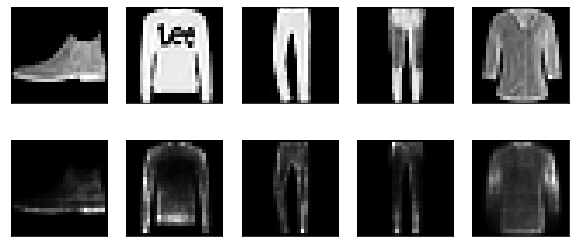

In [ ]:

plot_autoencoder_outputs(autoencoder, 5, (28, 28))

In [ ]:
def plot_autoencoder_outputs(autoencoder, n, dims):
    decoded_imgs = autoencoder.predict(x_test)

 
    n = 5
    plt.figure(figsize=(10, 4.5))
    for i in range(n):
        # plot original image
        ax = plt.subplot(2, n, i + 1)
        plt.imshow(x_test[i].reshape(*dims))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
        if i == n/2:
            ax.set_title('Original Images')

        # plot reconstruction 
        ax = plt.subplot(2, n, i + 1 + n)
        plt.imshow(decoded_imgs[i].reshape(*dims))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
        if i == n/2:
            ax.set_title('Reconstructed Images')
    plt.show()

# ######## Denoising Autoencoder ##############***


In [ ]:
noise_factor = 0.4
x_train_noisy = x_train + noise_factor * np.random.normal(size=x_train.shape) 
x_test_noisy = x_test + noise_factor * np.random.normal(size=x_test.shape)

x_train_noisy = np.clip(x_train_noisy, 0.0, 1.0)
x_test_noisy = np.clip(x_test_noisy, 0.0, 1.0)

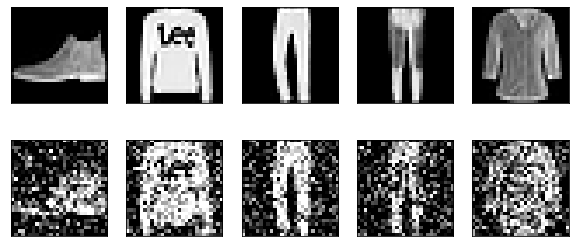

In [ ]:
n = 5
plt.figure(figsize=(10, 4.5))
for i in range(n):
    # plot original image
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    if i == n/2:
        ax.set_title('Original Images')

    # plot noisy image 
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    if i == n/2:
        ax.set_title('Noisy Input')

In [ ]:
encoding_dim = 32  
input_img = keras.Input(shape=(784,))
encoded = layers.Dense(encoding_dim, activation='relu')(input_img)
decoded = layers.Dense(784, activation='sigmoid')(encoded)
autoencoder = keras.Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder.fit(x_train_noisy, x_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3903
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3132
Epoch 3/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3041
Epoch 4/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3011
Epoch 5/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2991
Epoch 6/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2987
Epoch 7/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2985
Epoch 8/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2992
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2985
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2986


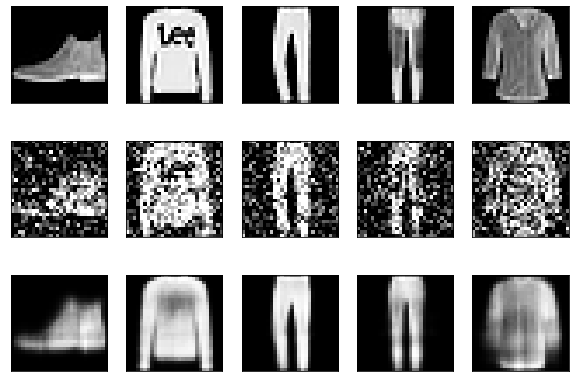

In [ ]:
n = 5
plt.figure(figsize=(10, 7))

images = autoencoder.predict(x_test_noisy)

for i in range(n):
    # plot original image
    ax = plt.subplot(3, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    if i == n/2:
        ax.set_title('Original Images')

    # plot noisy image 
    ax = plt.subplot(3, n, i + 1 + n)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    if i == n/2:
        ax.set_title('Noisy Input')
        
    # plot noisy image 
    ax = plt.subplot(3, n, i + 1 + 2*n)
    plt.imshow(images[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    if i == n/2:
        ax.set_title('Autoencoder Output')

######### VARIATIONAL AUTO ENCODER #########################




In [21]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

11493376/11490434 [==============================] - 0s 0us/step


In [22]:
original_dim = 28 * 28
intermediate_dim = 64
latent_dim = 2

inputs = keras.Input(shape=(original_dim,))
h = layers.Dense(intermediate_dim, activation='relu')(inputs)
z_mean = layers.Dense(latent_dim)(h)
z_log_sigma = layers.Dense(latent_dim)(h)

In [23]:
from keras import backend as K

def sampling(args):
    z_mean, z_log_sigma = args
    epsilon = K.random_normal(shape=(K.shape(z_mean)[0], latent_dim),mean=0., stddev=0.1)
    return z_mean + K.exp(z_log_sigma) * epsilon

z = layers.Lambda(sampling)([z_mean, z_log_sigma])

In [24]:
encoder = keras.Model(inputs, [z_mean, z_log_sigma, z], name='encoder')
latent_inputs = keras.Input(shape=(latent_dim,), name='z_sampling')
x = layers.Dense(intermediate_dim, activation='relu')(latent_inputs)
outputs = layers.Dense(original_dim, activation='sigmoid')(x)
decoder = keras.Model(latent_inputs, outputs, name='decoder')

outputs = decoder(encoder(inputs)[2])
vae = keras.Model(inputs, outputs, name='vae_mlp')

In [28]:
reconstruction_loss = keras.losses.binary_crossentropy(inputs, outputs)
reconstruction_loss =reconstruction_loss*original_dim
kl_loss = 1 + z_log_sigma - K.square(z_mean) - K.exp(z_log_sigma)
kl_loss = K.sum(kl_loss, axis=-1)
kl_loss = kl_loss*-0.5
vae_loss = K.mean(reconstruction_loss + kl_loss)
vae.add_loss(vae_loss)
vae.compile(optimizer='adam')
vae.fit(x_train, x_train,epochs=100,batch_size=32,validation_data=(x_test, x_test))

Epoch 1/100
1875/1875 [==============================] - 8s 4ms/step - loss: 220.1720 - val_loss: 168.0197
Epoch 2/100
1875/1875 [==============================] - 7s 4ms/step - loss: 167.9434 - val_loss: 163.2955
Epoch 3/100
1875/1875 [==============================] - 7s 4ms/step - loss: 163.4687 - val_loss: 159.8542
Epoch 4/100
1875/1875 [==============================] - 7s 4ms/step - loss: 159.6412 - val_loss: 157.6017
Epoch 5/100
1875/1875 [==============================] - 7s 4ms/step - loss: 157.5168 - val_loss: 156.1205
Epoch 6/100
1875/1875 [==============================] - 7s 4ms/step - loss: 155.8018 - val_loss: 154.6892
Epoch 7/100
1875/1875 [==============================] - 7s 4ms/step - loss: 154.2317 - val_loss: 153.8075
Epoch 8/100
1875/1875 [==============================] - 7s 4ms/step - loss: 153.3720 - val_loss: 153.0613
Epoch 9/100
1875/1875 [==============================] - 7s 4ms/step - loss: 153.1390 - val_loss: 152.2633
Epoch 10/100
1875/1875 [=============

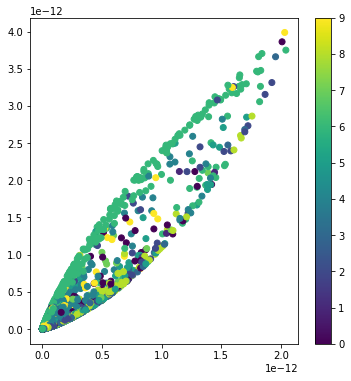

In [31]:
x_test_encoded = vae.predict(x_test)
plt.figure(figsize=(6, 6))
plt.scatter(x_test_encoded[:, 0], x_test_encoded[:, 1], c=y_test)
plt.colorbar()
plt.show()